In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
def data_loading():
    station_data = pd.read_csv('stations_cleaned.csv.gz')
    kmeans = pd.read_csv('kmeans_output')
    kmeans = kmeans.drop('Unnamed: 0', axis = 1)
    station_data = station_data.set_index('dock_name')
    kmeans = kmeans.set_index('start station name')
    station_data = station_data.merge(kmeans, left_index = True, right_on = 'start station name')
    station_data = station_data.reset_index()
    station_data.hour = station_data.hour.astype(str).apply(lambda x: x.zfill(2))
    station_data.loc[station_data['hour'] == '24', 'hour'] = '00'
    station_data.minute = station_data.minute.astype(str).apply(lambda x: x.zfill(2))
    station_data['time'] = station_data.hour + ':' + station_data.minute + ':' +  '00'
    station_data['datetime'] = pd.to_datetime(station_data['date'] + ' ' + station_data['time'])
    station_data = station_data.set_index(station_data['datetime'])
    return station_data

In [3]:
station_data = data_loading()

/home/ubuntu/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
status_counts = station_data.groupby([pd.Grouper(freq = 'm'),'cluster', 'dock_status'])['datetime'].count()

In [5]:
status_counts = status_counts.unstack(['datetime', 'cluster'])

In [6]:
empty_count = status_counts.loc['Empty Alert',:]
empty_count.index = [empty_count.index.get_level_values(0).date, empty_count.index.get_level_values(1)]

In [7]:
empty_count_0 = empty_count.loc[pd.IndexSlice[:,0]]

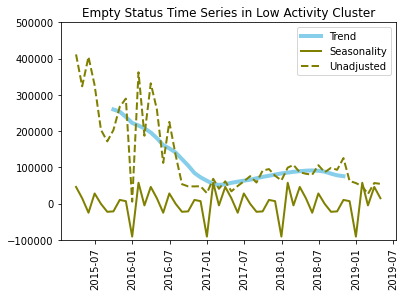

In [8]:
result = seasonal_decompose(empty_count_0, model='additive')
plt.plot( empty_count_0.index, result.trend, marker='', 
         markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( empty_count_0.index, result.seasonal, marker='', 
         color='olive', linewidth=2)
plt.plot( empty_count_0.index, empty_count_0, marker='', 
         color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend(['Trend', 'Seasonality', 'Unadjusted'])
plt.xticks(rotation=90)
plt.title('Empty Status Time Series in Low Activity Cluster')
plt.ylim(-100000, 500000)
plt.show()

In [9]:
empty_count_1 = empty_count.loc[pd.IndexSlice[:,1]]

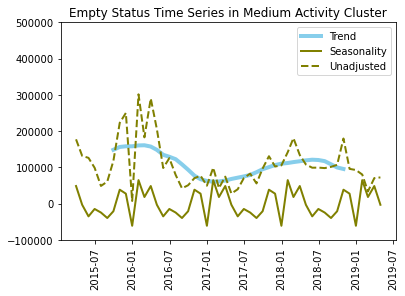

In [10]:
result = seasonal_decompose(empty_count_1, model='additive')
plt.plot( empty_count_1.index, result.trend, marker='', 
         markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( empty_count_1.index, result.seasonal, marker='', 
         color='olive', linewidth=2)
plt.plot( empty_count_1.index, empty_count_1, marker='', 
         color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend(['Trend', 'Seasonality', 'Unadjusted'])
plt.xticks(rotation=90)
plt.title('Empty Status Time Series in Medium Activity Cluster')
plt.ylim(-100000, 500000)
plt.show()

In [11]:
empty_count_2 = empty_count.loc[pd.IndexSlice[:,2]]

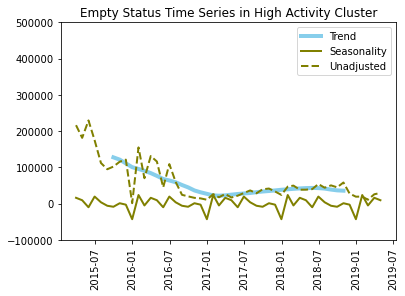

In [12]:
result = seasonal_decompose(empty_count_2, model='additive')
plt.plot( empty_count_2.index, result.trend, marker='', 
         markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( empty_count_2.index, result.seasonal, marker='', 
         color='olive', linewidth=2)
plt.plot( empty_count_2.index, empty_count_2, marker='', 
         color='olive', linewidth=2, linestyle ='dashed', label="toto")
plt.legend(['Trend', 'Seasonality', 'Unadjusted'])
plt.xticks(rotation=90)
plt.title('Empty Status Time Series in High Activity Cluster')
plt.ylim(-100000, 500000)
plt.show()

In [13]:
status_counts

datetime    2015-03-31                 2015-04-30                 2015-05-31  \
cluster              0       1       2          0       1       2          0   
dock_status                                                                    
Empty Alert     411913  177530  216566     323836  131921  181662     405162   
Full Alert       49030   14302   37594     105297   35625   70024      87938   
Healthy         195723   85846  122216     152051   86677   92553     160294   

datetime                    2015-06-30  ... 2019-01-31 2019-02-28         \
cluster           1       2          0  ...          2          0      1   
dock_status                             ...                                
Empty Alert  126446  229692     326853  ...      19617      26904  33864   
Full Alert    41076   50359     121561  ...      19361      19038  14665   
Healthy      109149  100603     178602  ...      18382      25660  25921   

datetime           2019-03-31               2019-04-30                
cluster          2          0      1      2          0      1      2  
dock_status                                                           
Empty Alert  10933      57013  70500  25952      54720  72509  29614  
Full Alert   13638      40983  74606  20749      27105  52473  12065  
Healthy      10665      52088  79513  23310      37498  57231  19441  

[3 rows x 150 columns]

In [14]:
full_count = status_counts.loc['Full Alert',:]
full_count.index = [full_count.index.get_level_values(0).date, full_count.index.get_level_values(1)]

In [15]:
full_count_0 = full_count.loc[pd.IndexSlice[:,0]]

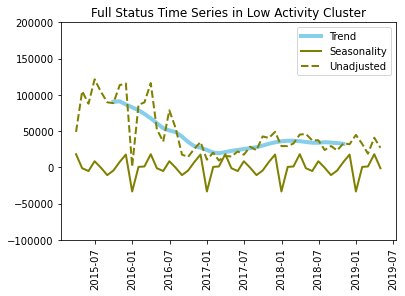

In [16]:
result = seasonal_decompose(full_count_0, model='additive')
plt.plot(full_count_0.index, result.trend, marker='', 
         markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot(full_count_0.index, result.seasonal, marker='', 
         color='olive', linewidth=2)
plt.plot(full_count_0.index, full_count_0, marker='', 
         color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend(['Trend', 'Seasonality', 'Unadjusted'])
plt.xticks(rotation=90)
plt.title('Full Status Time Series in Low Activity Cluster')
plt.ylim(-100000, 200000)
plt.show()

In [17]:
full_count_1 = full_count.loc[pd.IndexSlice[:,1]]

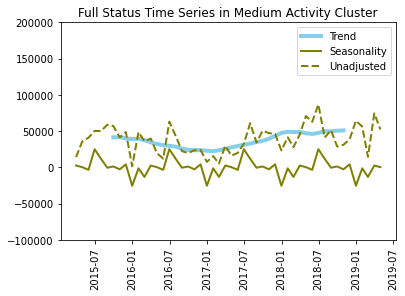

In [18]:
result = seasonal_decompose(full_count_1, model='additive')
plt.plot(full_count_1.index, result.trend, marker='', 
         markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot(full_count_1.index, result.seasonal, marker='', 
         color='olive', linewidth=2)
plt.plot(full_count_1.index, full_count_1, marker='', 
         color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend(['Trend', 'Seasonality', 'Unadjusted'])
plt.xticks(rotation=90)
plt.title('Full Status Time Series in Medium Activity Cluster')
plt.ylim(-100000, 200000)
plt.show()

In [19]:
full_count_2 = full_count.loc[pd.IndexSlice[:,2]]

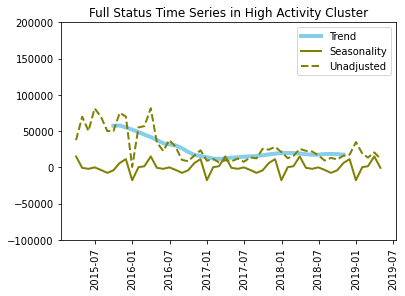

In [20]:
result = seasonal_decompose(full_count_2, model='additive')
plt.plot(full_count_2.index, result.trend, marker='', 
         markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot(full_count_2.index, result.seasonal, marker='', 
         color='olive', linewidth=2)
plt.plot(full_count_2.index, full_count_2, marker='', 
         color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend(['Trend', 'Seasonality', 'Unadjusted'])
plt.xticks(rotation=90)
plt.title('Full Status Time Series in High Activity Cluster')
plt.ylim(-100000, 200000)
plt.show()

In [21]:
healthy_count = status_counts.loc['Healthy',:]
healthy_count.index = [healthy_count.index.get_level_values(0).date, empty_count.index.get_level_values(1)]

In [22]:
healthy_count_0 = healthy_count.loc[pd.IndexSlice[:,0]]

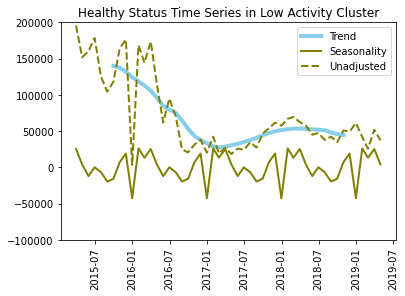

In [24]:
result = seasonal_decompose(healthy_count_0, model='additive')
plt.plot(healthy_count_0.index, result.trend, marker='', 
         markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot(healthy_count_0.index, result.seasonal, marker='', 
         color='olive', linewidth=2)
plt.plot(healthy_count_0.index, healthy_count_0, marker='', 
         color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend(['Trend', 'Seasonality', 'Unadjusted'])
plt.xticks(rotation=90)
plt.title('Healthy Status Time Series in Low Activity Cluster')
plt.ylim(-100000, 200000)
plt.show()

In [25]:
healthy_count_1 = healthy_count.loc[pd.IndexSlice[:,1]]

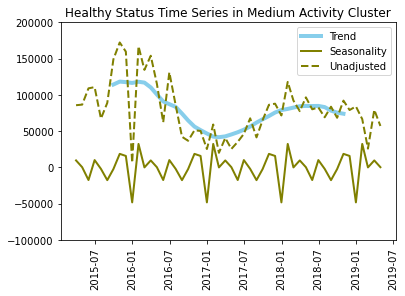

In [26]:
result = seasonal_decompose(healthy_count_1, model='additive')
plt.plot(healthy_count_1.index, result.trend, marker='', 
         markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot(healthy_count_1.index, result.seasonal, marker='', 
         color='olive', linewidth=2)
plt.plot(healthy_count_1.index, healthy_count_1, marker='', 
         color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend(['Trend', 'Seasonality', 'Unadjusted'])
plt.xticks(rotation=90)
plt.title('Healthy Status Time Series in Medium Activity Cluster')
plt.ylim(-100000, 200000)
plt.show()

In [27]:
healthy_count_2 = healthy_count.loc[pd.IndexSlice[:,2]]

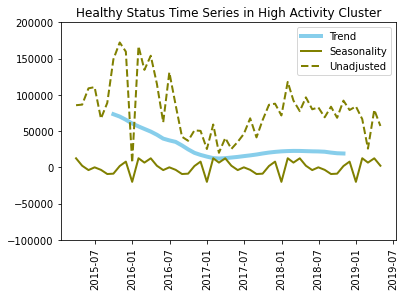

In [28]:
result = seasonal_decompose(healthy_count_2, model='additive')
plt.plot(healthy_count_2.index, result.trend, marker='', 
         markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot(healthy_count_2.index, result.seasonal, marker='', 
         color='olive', linewidth=2)
plt.plot(healthy_count_2.index, healthy_count_1, marker='', 
         color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend(['Trend', 'Seasonality', 'Unadjusted'])
plt.xticks(rotation=90)
plt.title('Healthy Status Time Series in High Activity Cluster')
plt.ylim(-100000, 200000)
plt.show()